In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GPs.Kernel import SqExp, RQ, ExpSine, WhiteNoise
from GPs.GP import GPR

%matplotlib inline

# Plotting Function Definitions

In [2]:
def plotprior(x_star,y_sample_prior,title=''):
    '''
    Plot samples from the prior distribution with appropriate labels.
    '''
    plt.plot(x_star,y_sample_prior)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Prior Distribution\n'+title)

def plotposterior(x,y,x_star,y_sample_posterior,y_mean,title=''):
    '''
    Plot samples from the posterior distibution with appropriate labels.
    '''
    plt.plot(x_star,y_sample_posterior,label='Sample')
    plt.plot(x_star,y_mean,'k-',lw=2,label='Mean')
    plt.scatter(x,y,s=50,label='Training Data')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Posterior Distribution\n'+title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Initialize

## Define the Training Data Set
Define the training dataset for the independent and dependent variables

In [3]:
x = np.array([-1.50,-1.00,-0.75,-0.40,-0.25,0.00])
y = x*np.sin(x)

## Define the Test Set
Define the training dataset for the independent variables. In this case it is a "continuous" curve

In [4]:
x_star = np.linspace(-10,10,500)

## Train the GP Models

Instantiate the kernel, instantiate the GPs with the kernels, and train the model.

In [5]:
k1 = SqExp(1,1)
k2 = SqExp(2,1)
k3 = RQ(1,1,2)
k4 = ExpSine(1,1,5)

In [6]:
gp1 = GPR(k1)
gp1.train(x,y)

gp2 = GPR(k2)
gp2.train(x,y)

gp3 = GPR(k3)
gp3.train(x,y)

gp4 = GPR(k4)
gp4.train(x,y)

In [7]:
title1 = 'Squared Exponential'
title2 = 'Squared Exponential (longer lengthscale)'
title3 = 'Rational Quadratic'
title4 = 'Periodic'

# Sampling

Sample from both the prior distribution (N~(0,K)) and the posterior distirubtion (N~()) of a Gaussian process. The best prediction of the regression is the mean of the posterior distribution, which is shown as the thick black line.

## Sample from GP Prior
Sample from the prior distribution (i.e., no training data).

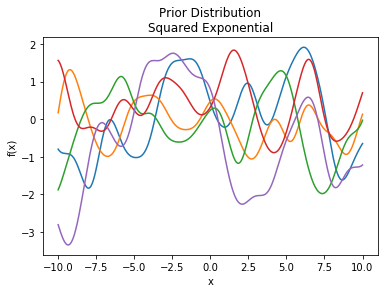

In [8]:
y_sample_prior1 = gp1.sample_from_prior(x_star,n=5)
plotprior(x_star,y_sample_prior1,title=title1)

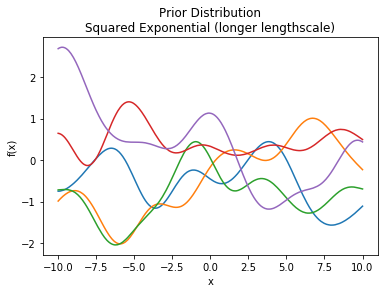

In [9]:
y_sample_prior2 = gp2.sample_from_prior(x_star,n=5)
plotprior(x_star,y_sample_prior2,title=title2)

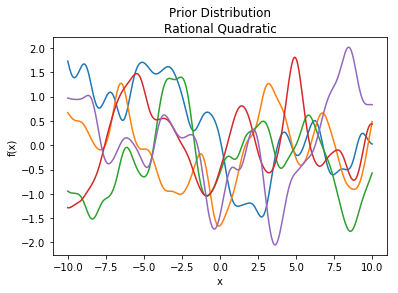

In [10]:
y_sample_prior3 = gp3.sample_from_prior(x_star,n=5)
plotprior(x_star,y_sample_prior3,title=title3)

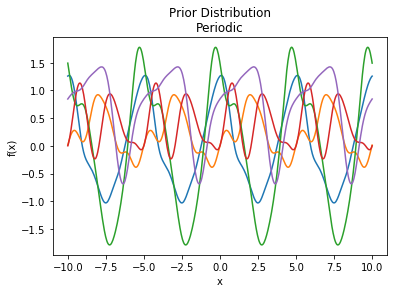

In [11]:
y_sample_prior4 = gp4.sample_from_prior(x_star,n=5)
plotprior(x_star,y_sample_prior4,title=title4)

## Sample from GP Posterior
Sample from the posterior distribution (i.e., with training data).

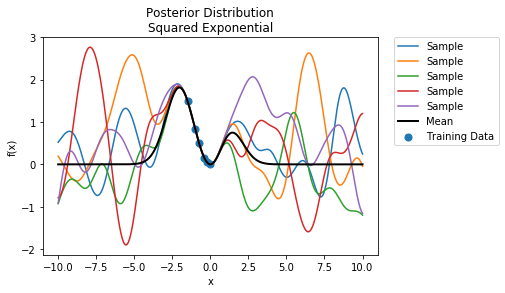

In [12]:
y_sample_posterior1 = gp1.sample_from_posterior(x_star,n=5)
y_mean1,y_var1 = gp1.predict(x_star,False)
plotposterior(x,y,x_star,y_sample_posterior1,y_mean1,title1)

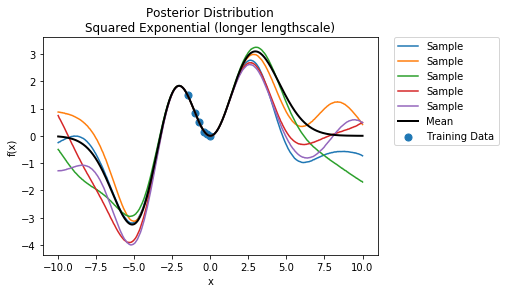

In [13]:
y_sample_posterior2 = gp2.sample_from_posterior(x_star,n=5)
y_mean2,y_var2 = gp2.predict(x_star,False)
plotposterior(x,y,x_star,y_sample_posterior2,y_mean2,title2)

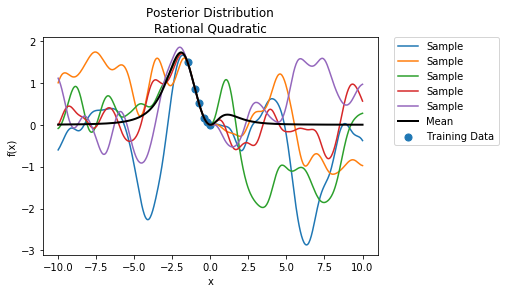

In [14]:
y_sample_posterior3 = gp3.sample_from_posterior(x_star,n=5)
y_mean3,y_var3 = gp3.predict(x_star,False)
plotposterior(x,y,x_star,y_sample_posterior3,y_mean3,title3)

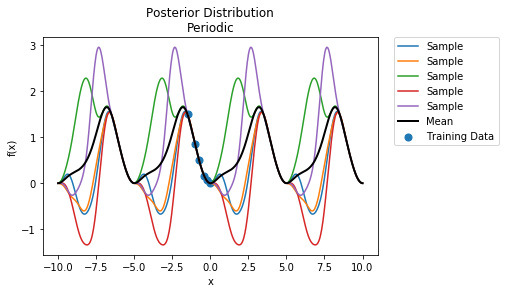

In [15]:
y_sample_posterior4 = gp4.sample_from_posterior(x_star,n=5)
y_mean4,y_var4 = gp4.predict(x_star,False)
plotposterior(x,y,x_star,y_sample_posterior4,y_mean4,title4)